In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
#print(boston.DESCR)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
X = boston_df[['LSTAT']].values
y = boston_df['MEDV'].values

In [20]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))
print('R^2: {:.2f}'.format(slr.score(X, y)))

Slope: -0.82
Intercept: 54.05
R^2: 0.61


ValueError: x and y must be the same size

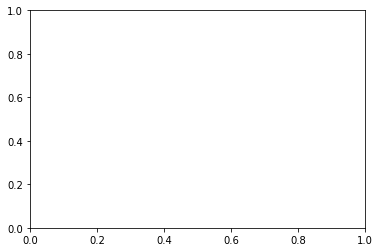

In [21]:
fig, axis = plt.subplots()
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red', linewidth=2);
axis.grid(True)
plt.show()

ValueError: x and y must be the same size

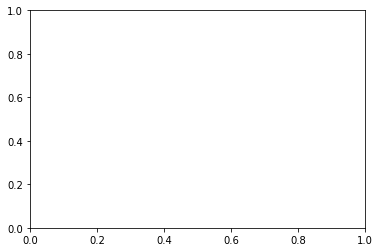

In [22]:
residual = y-slr.predict(X)

plt.scatter(X,residual)
plt.xlabel("x - a predictor")
plt.ylabel("residual")
plt.show()

Another way to plot: sns.regplot(x="LSTAT", y="MEDV", data=boston_df)

import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('MEDV ~ LSTAT', data=boston_df).fit()
results.summary()

In [25]:
X = boston_df[['LSTAT']].values
y = boston_df['MEDV'].values

regr = LinearRegression()

In [26]:
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

In [27]:
regr = regr.fit(X, y)
y_lin_pred = regr.predict(X_fit)
linear_r2 = regr.score(X,y)
print('R^2: {:.2f}'.format(linear_r2))

R^2: 0.54


In [28]:
regr = regr.fit(np.sqrt(X), y)
y_sqrt_pred = regr.predict(np.sqrt(X_fit))
sqrt_r2 = regr.score(np.sqrt(X), y)
print('R^2: {:.2f}'.format(sqrt_r2))

R^2: 0.62


In [29]:
regr = regr.fit(np.log(X), y)
y_log_pred = regr.predict(np.log(X_fit))
log_r2 = regr.score(np.log(X), y)
print('R^2: {:.2f}'.format(log_r2))

R^2: 0.66


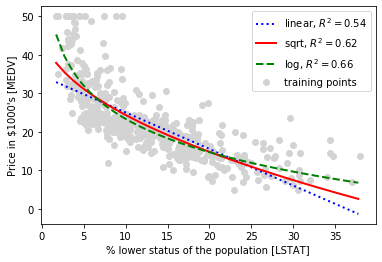

In [30]:
# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_pred, 
         label='linear, $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_sqrt_pred, 
         label='sqrt, $R^2={:.2f}$'.format(sqrt_r2),
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_log_pred, 
         label='log, $R^2={:.2f}$'.format(log_r2),
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

R^2: 0.69


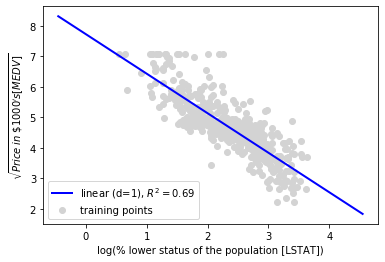

In [31]:
X = boston_df[['LSTAT']].values
y = boston_df['MEDV'].values

# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = regr.score(X_log,y_sqrt)
print('R^2: {:.2f}'.format(linear_r2))

# plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2), 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')

In [40]:
from scipy.stats import boxcox

y_boxcox = boxcox(boston_df['MEDV'].values)[0]

regr = LinearRegression()

regr = regr.fit(X, y_boxcox)
y_lin_fit = regr.predict(X_fit)
linear_r2 = regr.score(X_fit,y_boxcox)
print('R^2: {:.2f}'.format(linear_r2))

plt.scatter(X, y_boxcox, label='data', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear, $R^2={:.2f}$'.format(linear_r2), color='blue', lw=2)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

R^2: 0.69


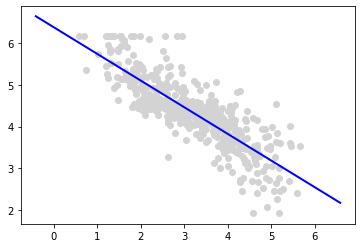

In [34]:
z = boxcox(boston_df['LSTAT'].values)[0]
x_boxcox = z.reshape(-1, 1)

regr = LinearRegression()

X_fit_new = np.arange(x_boxcox.min()-1, x_boxcox.max()+1, 1)[:, np.newaxis]

regr = regr.fit(x_boxcox, y_boxcox)
y_lin_fit = regr.predict(X_fit_new)
linear_r2 = regr.score(x_boxcox,y_boxcox)
print('R^2: {:.2f}'.format(linear_r2))

plt.scatter(x_boxcox, y_boxcox, label='data', color='lightgray')
plt.plot(X_fit_new, y_lin_fit, label='linear, $R^2={:.2f}$'.format(linear_r2), color='blue', lw=2)

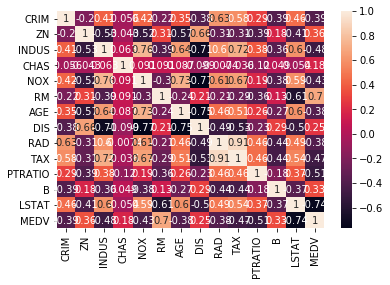

In [35]:
hm = sns.heatmap(boston_df.corr(),
                 cbar=True,
                 annot=True)

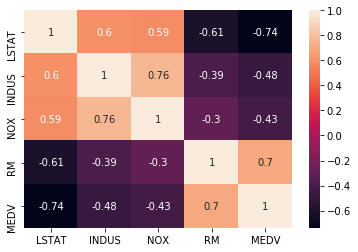

In [36]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
hm = sns.heatmap(boston_df[cols].corr(),
                 cbar=True,
                 annot=True)

In [37]:
X = boston_df[['LSTAT','PTRATIO']].values
y = boston_df['MEDV'].values

In [38]:
X_with_one = sm.add_constant(X)
results = sm.OLS(y, X_with_one).fit()
print(results.summary())

NameError: name 'sm' is not defined

In [ ]:
z1 = boxcox(boston_df['PTRATIO'].values)[0]
z2 = np.column_stack((z, z1))
X_boxcox = z2
print(X_boxcox[0:4])

XX_with_one = sm.add_constant(X_boxcox)
results = sm.OLS(y_boxcox, XX_with_one).fit()
print(results.summary())

In [39]:
x_new = sm.add_constant(np.arange(10).reshape((-1, 2)))
y_new = results.predict(x_new)
print(y_new)

NameError: name 'sm' is not defined

In [ ]:
corr=np.corrcoef(z,z1,rowvar=0)
W,V=np.linalg.eig(corr)
W